## Decision Tree Regressor Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
##California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [5]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
df = pd.DataFrame(california_df.data , columns=california_df.feature_names)
df['Target'] = california_df.target

In [9]:
df.shape

(20640, 9)

In [10]:
#independent features 
X = df.iloc[:,:-1]
#dependent features 
y = df.iloc[:,-1]

In [11]:
# train test split 
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y , test_size = 0.33 , random_state = 42)

In [17]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor()

In [18]:
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
y_pred

array([0.565  , 0.521  , 5.00001, ..., 1.222  , 1.389  , 5.00001])

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.5934223438799228

In [29]:
# Hyperparameter Tuning 
parameter = {
    'criterion' : ['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter' : ['best','random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto','sqrt','log2']
    }

regressor=DecisionTreeRegressor()

In [30]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor,param_grid = parameter ,cv=2,scoring='neg_mean_squared_error')

In [31]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [32]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [33]:
regressor = DecisionTreeRegressor(criterion='poisson',max_depth=7,max_features='log2',splitter='best')

In [34]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='log2')

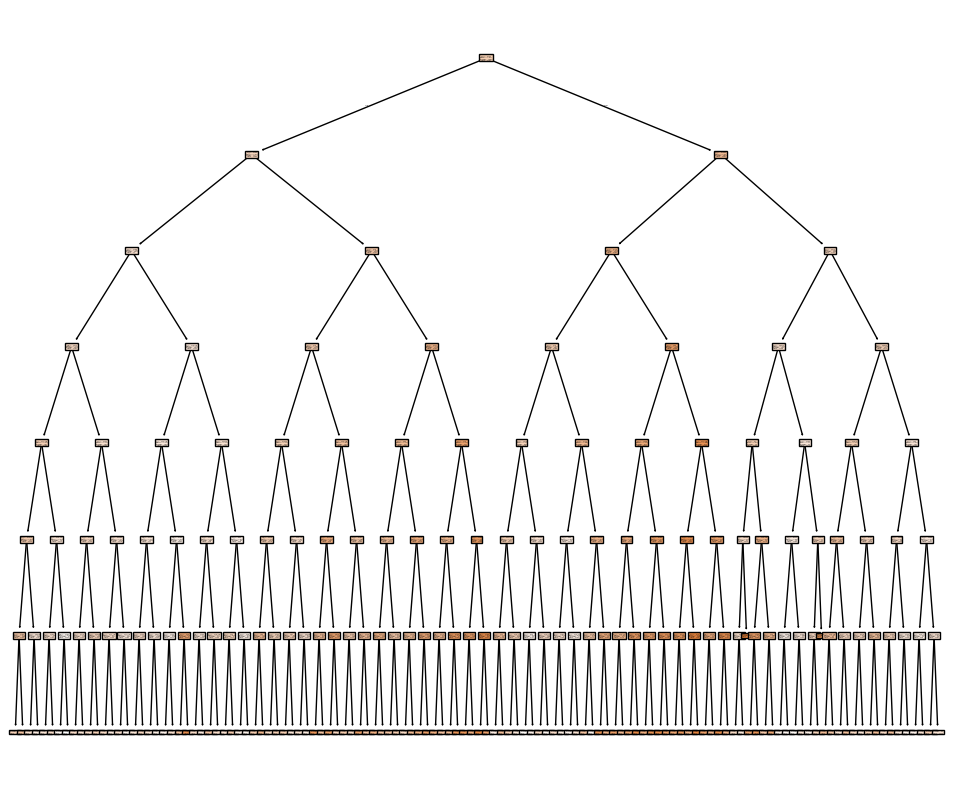

In [36]:
from sklearn import tree 
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
r2_score(y_test,y_pred)

0.6102558277076306